<h1>Customer Personality Analysis<h1>

<h2>Algorithmes de Clustering<h2>

<h2>Veille sur les algorithmes de classification non supervisée</h2>
<br>
<p>I - K - Mean : Algorithme de Clustering & de Machine Learning<br>
En machine learning, le clustering est une discipline particulière. Elle a pour objectif de séparer les données en groupes homogènes ayant des caractéristiques communes, ce domaine est très utilisé en marketing pour segmenter les bases clients afin de détecter des comportements particuliers. Cet algorithme est très connu en matière de clustering. Conçu en 1957, il n'a été présenté qu'en 1982. Les champs d'application peuvent être différents : segmentation client, analyse de donnée, segmenter une image, apprentissage semi-supervisé….<p><br>
<p>Principe de l'algorithme :</p><br>
![](./img/centroides.png)<br>
<p>Il faut des points et un entier, cet algorithme a pour but de diviser les points en groupes "k" appelés clusters homogènes et compacts. Il faut définir 3 centroïdes aléatoirement auxquels il faut associer 3 étiquettes. Ensuite, chaque point est associé au centroïde le plus proche et à l'étiquette correspondante. Les centroïdes sont recalculés en fonction des points associés et l'algorithme est répété jusqu'à ce que les centroïdes ne bougent plus.</p><br>
<h2>Notion de distance et initialisation :</h2>
<p>Il faut savoir : - quelle est la distance entre les points et les centroïdes ?<br>
- le nombre de clusters à choisir<br>
Généralement</p>

C:\Users\taral\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\taral\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


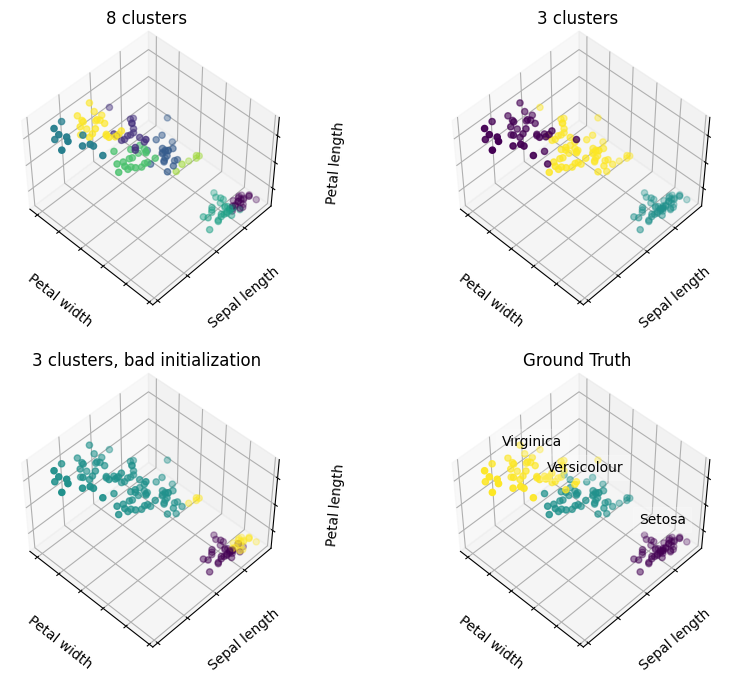

In [85]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float))

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(title)

ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

<h2>Données de l'épicerie</h2>

<p>Import des librairies</p>

In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

<p>Import des données</p>

In [87]:
#Import du dataset
df = pd.read_csv("marketing_campaign.csv", sep=None)

C:\Users\taral\AppData\Local\Temp\ipykernel_12844\3395795874.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("marketing_campaign.csv", sep=None)


In [88]:
#Début du dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [89]:
#Fin du dataset
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [90]:
#Informations sur le dataset
df.shape

(2240, 29)

In [91]:
df.isnull().sum()
#On peut voir que la colonne "Income" contient 24 valeurs manquantes. 
#Cette valeur est négligeable car il y a 2240 lignes dans le dataset.

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [92]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


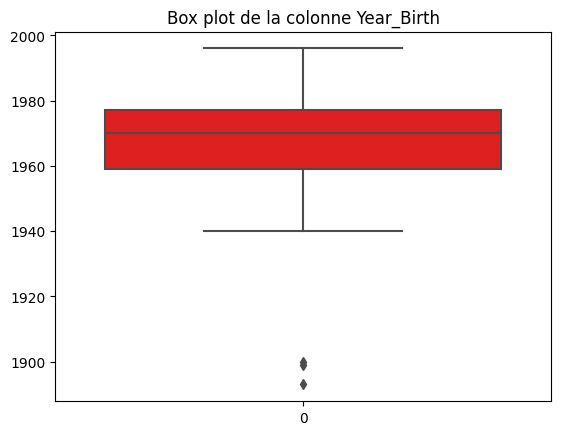

In [93]:
#Ici on cherche les valeurs abérentes dans le dataset et on les remplace dans le nouveau dataset
sns.boxplot(df['Year_Birth'], color = 'red')
plt.title(f'Box plot de la colonne Year_Birth')
plt.show()

In [94]:
#On retire les valeurs abérantes
df=df[(df["Year_Birth"]>1940) & (df["Year_Birth"]<2000)].reset_index(drop=True)

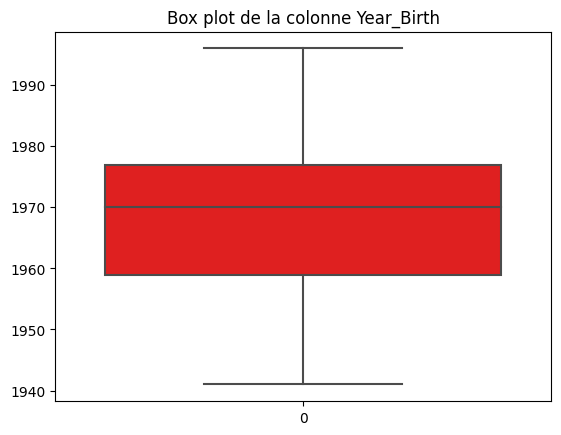

In [95]:
#Nouveau graph
sns.boxplot(df['Year_Birth'], color = 'red')
plt.title(f'Box plot de la colonne Year_Birth')
plt.show()

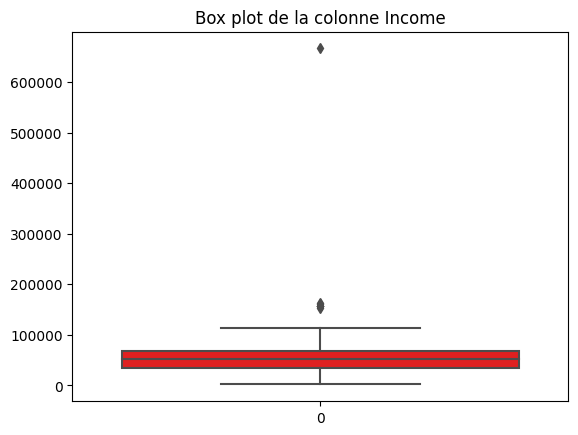

In [96]:
sns.boxplot(df['Income'], color = 'red')
plt.title(f'Box plot de la colonne Income')
plt.show()

In [97]:
#On retire les valeurs abérantes
df=df[(df["Income"]>0) & (df["Income"]<120000)].reset_index(drop=True)

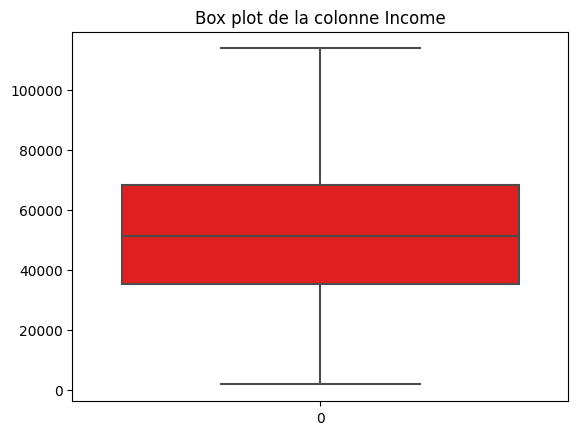

In [98]:
#Nouveau graph sans valeurs abérantes
sns.boxplot(df['Income'], color = 'red')
plt.title(f'Box plot de la colonne Income')
plt.show()

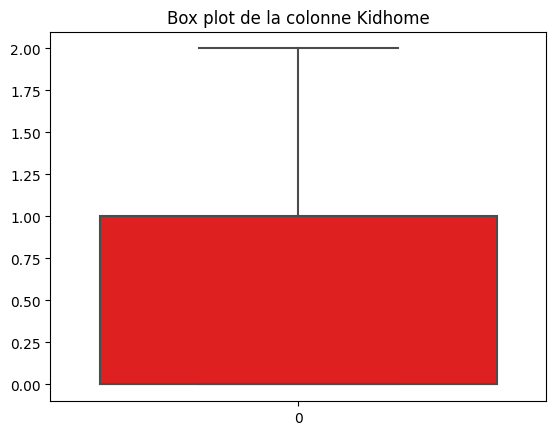

In [99]:
sns.boxplot(df['Kidhome'], color = 'red')
plt.title(f'Box plot de la colonne Kidhome')
plt.show()

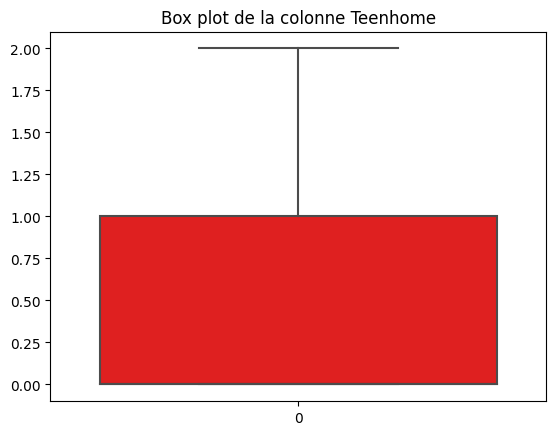

In [100]:
sns.boxplot(df['Teenhome'], color = 'red')
plt.title(f'Box plot de la colonne Teenhome')
plt.show()

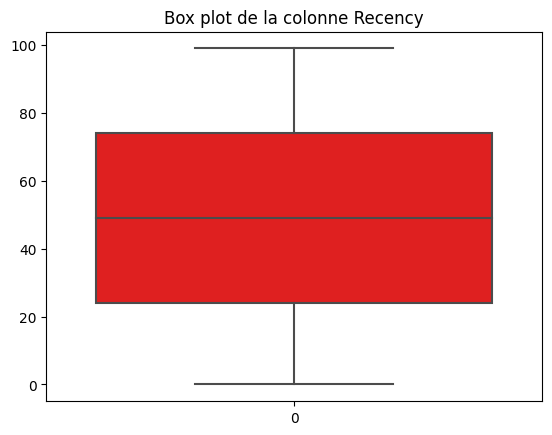

In [101]:
#Aucune valeur abérante dans la colonne Recency
sns.boxplot(df['Recency'], color = 'red')
plt.title(f'Box plot de la colonne Recency')
plt.show()

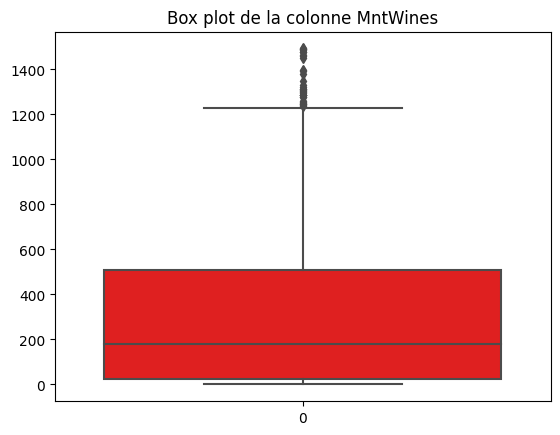

In [102]:
sns.boxplot(df['MntWines'], color = 'red')
plt.title(f'Box plot de la colonne MntWines')
plt.show()

In [103]:
df=df[(df["MntWines"]<20)].reset_index(drop=True)

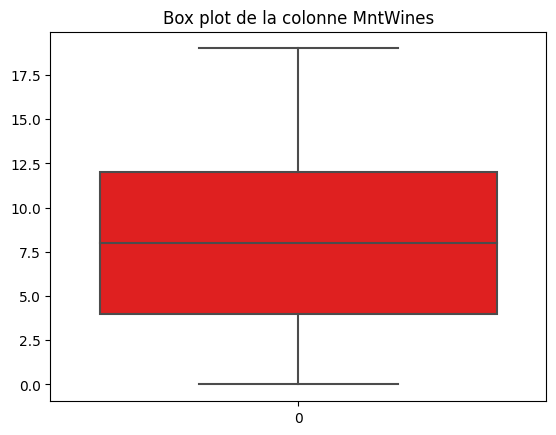

In [104]:
sns.boxplot(df['MntWines'], color = 'red')
plt.title(f'Box plot de la colonne MntWines')
plt.show()

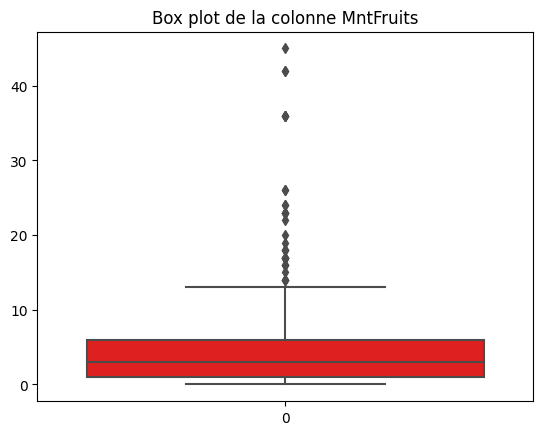

In [105]:
sns.boxplot(df['MntFruits'], color = 'red')
plt.title(f'Box plot de la colonne MntFruits')
plt.show()

In [106]:
df=df[(df["MntFruits"]<8)].reset_index(drop=True)

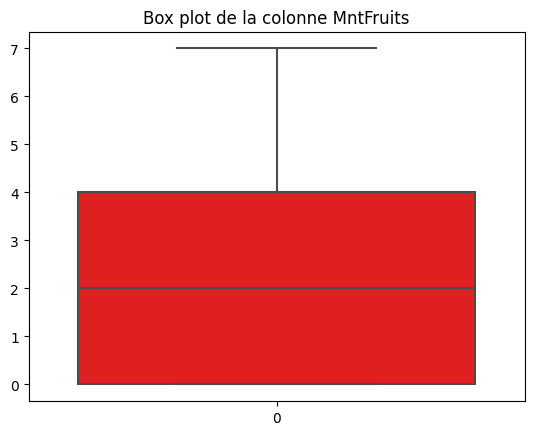

In [107]:
sns.boxplot(df['MntFruits'], color = 'red')
plt.title(f'Box plot de la colonne MntFruits')
plt.show()

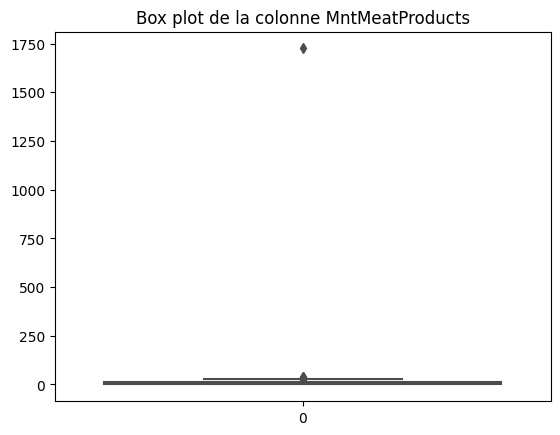

In [108]:
sns.boxplot(df['MntMeatProducts'], color = 'red')
plt.title(f'Box plot de la colonne MntMeatProducts')
plt.show()

In [109]:
df=df[(df["MntMeatProducts"]<25)].reset_index(drop=True)

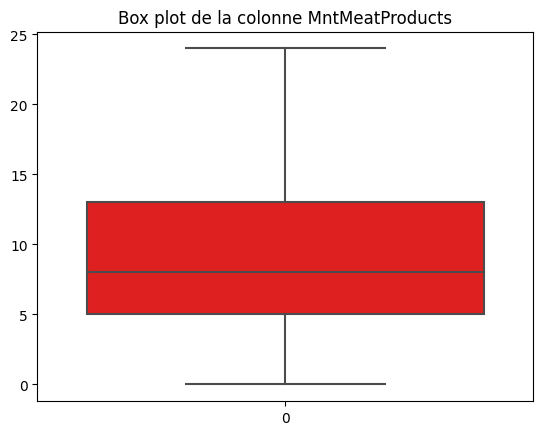

In [110]:
sns.boxplot(df['MntMeatProducts'], color = 'red')
plt.title(f'Box plot de la colonne MntMeatProducts')
plt.show()

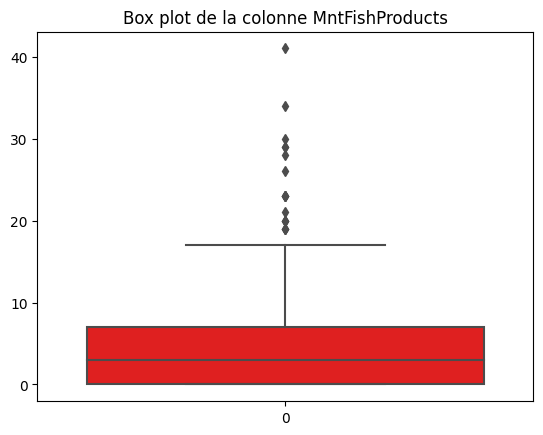

In [111]:
sns.boxplot(df['MntFishProducts'], color = 'red')
plt.title(f'Box plot de la colonne MntFishProducts')
plt.show()

In [112]:
df=df[(df["MntFishProducts"]<15)].reset_index(drop=True)

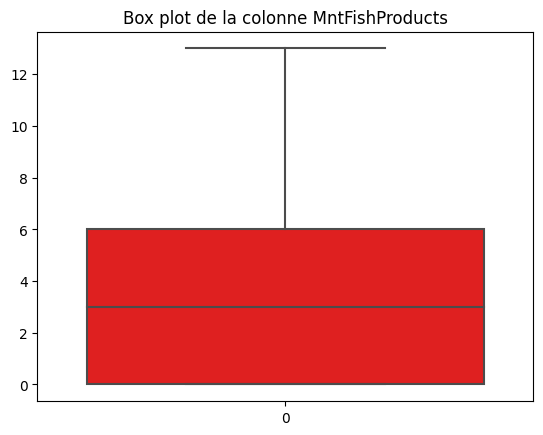

In [113]:
sns.boxplot(df['MntFishProducts'], color = 'red')
plt.title(f'Box plot de la colonne MntFishProducts')
plt.show()

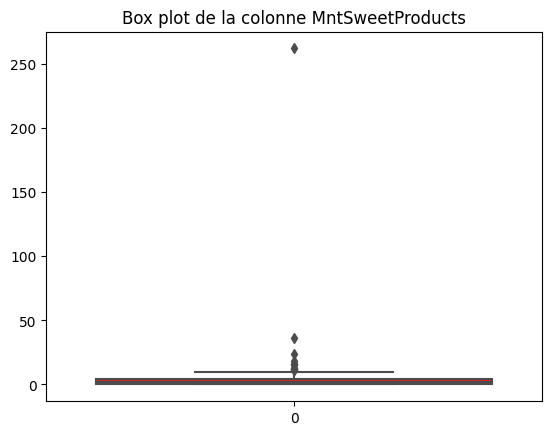

In [114]:
sns.boxplot(df['MntSweetProducts'], color = 'red')
plt.title(f'Box plot de la colonne MntSweetProducts')
plt.show()

In [115]:
df=df[(df["MntSweetProducts"]<8)].reset_index(drop=True)

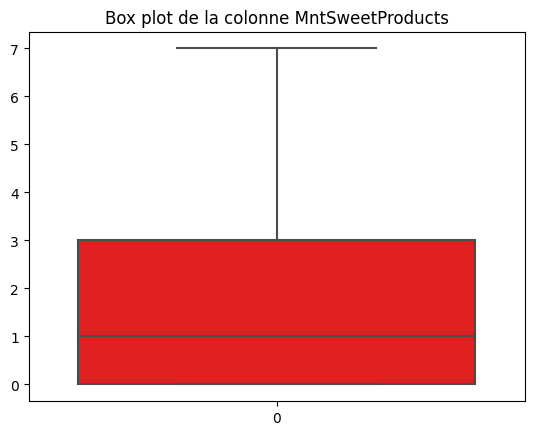

In [116]:
sns.boxplot(df['MntSweetProducts'], color = 'red')
plt.title(f'Box plot de la colonne MntSweetProducts')
plt.show()

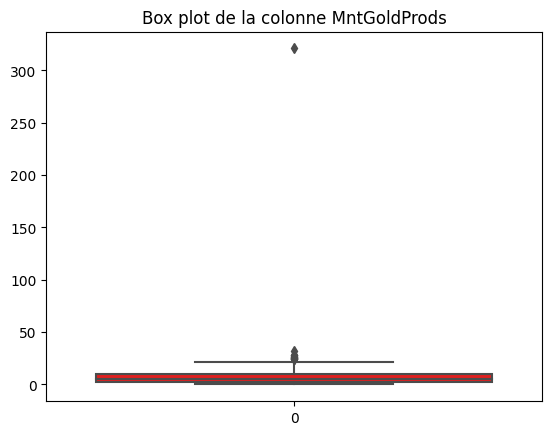

In [117]:
sns.boxplot(df['MntGoldProds'], color = 'red')
plt.title(f'Box plot de la colonne MntGoldProds')
plt.show()

In [118]:
df=df[(df["MntGoldProds"]<8)].reset_index(drop=True)

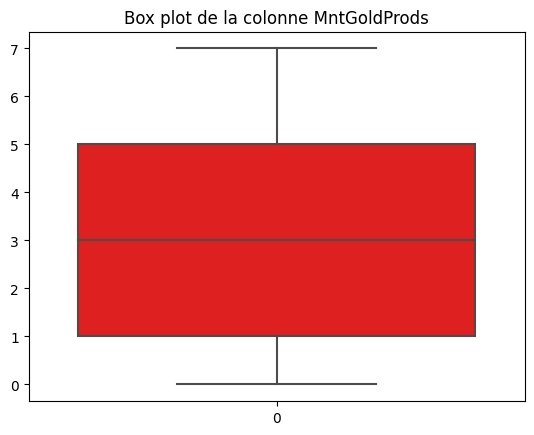

In [119]:
sns.boxplot(df['MntGoldProds'], color = 'red')
plt.title(f'Box plot de la colonne MntGoldProds')
plt.show()

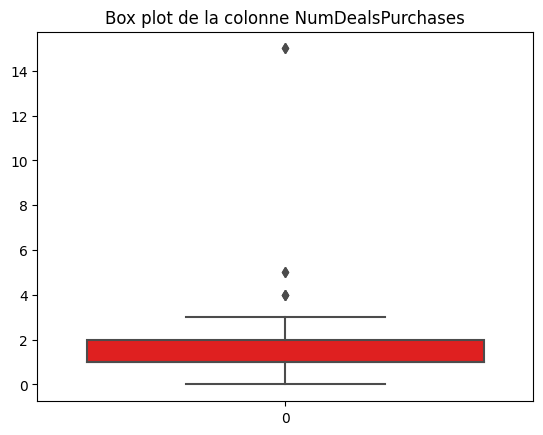

In [120]:
sns.boxplot(df['NumDealsPurchases'], color = 'red')
plt.title(f'Box plot de la colonne NumDealsPurchases')
plt.show()

In [121]:
df=df[(df["NumDealsPurchases"]<6)].reset_index(drop=True)

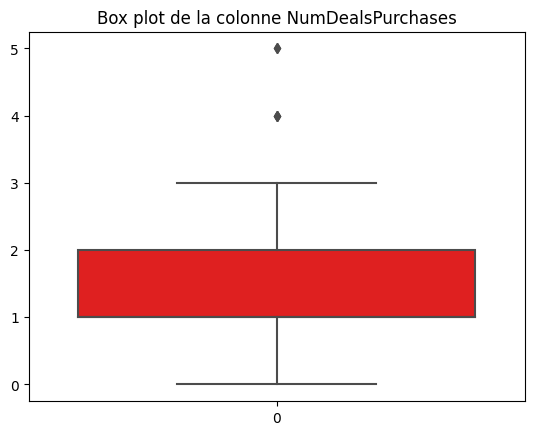

In [122]:
sns.boxplot(df['NumDealsPurchases'], color = 'red')
plt.title(f'Box plot de la colonne NumDealsPurchases')
plt.show()

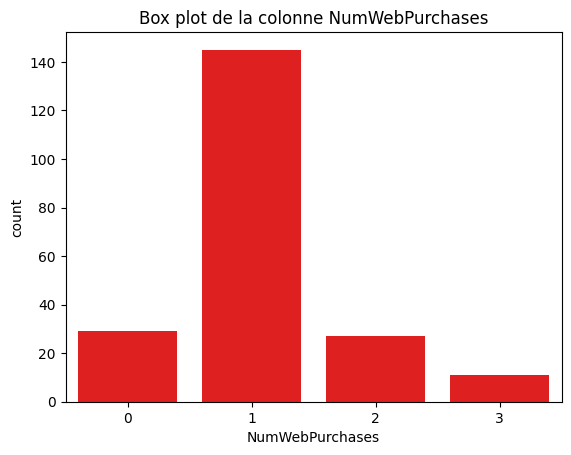

In [123]:
#Ici j'utilise un countplot car le 25%, le 50% et le 75% sont égaux à 1 donc le boxplot n'est pas lisible
sns.countplot(x=df['NumWebPurchases'], color = 'red')
plt.title(f'Box plot de la colonne NumWebPurchases')
plt.show()